In [20]:
import pandas as pd
import numpy as np
import plot_params
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn import preprocessing
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import PartialDependenceDisplay
from sklearn.tree import export_graphviz


In [4]:
df = pd.read_csv("mushrooms.csv")
plot_params.apply_rcparams()

In [5]:
df = df.rename(columns={'class' : 'edibility'})

In [35]:
label_encoders = {}  # Dictionary to store encoders for each column
df_encoded = df.copy()
for col in df_encoded.columns:
    le = preprocessing.LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save encoder for later decoding

# To decode values back to original labels
df_decoded = df_encoded.copy()
for col, le in label_encoders.items():
    df_decoded[col] = le.inverse_transform(df_encoded[col])  # Convert back
df_encoded = df.apply(lambda col: label_encoders.fit_transform(col))

AttributeError: 'dict' object has no attribute 'fit_transform'

In [13]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
X = df_encoded.iloc[:, [1,2,3,4,5,20]]
Y = df_encoded['edibility']
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, test_size=0.2, random_state=42)
rfc = rfc.fit(X_train,Y_train)

In [14]:
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9956923076923077


In [15]:
tree = rfc.estimators_[0]
dot_data = export_graphviz(tree, out_file=None, feature_names=X_train.columns,
                           class_names=['Edible', 'Poisonous'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree", view=True)

'random_forest_tree.pdf'

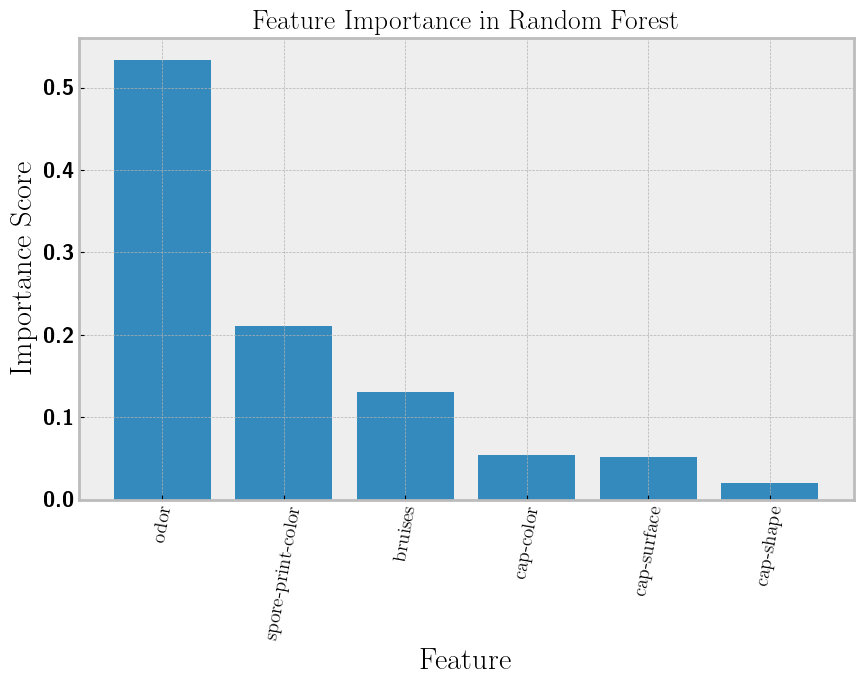

In [16]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=80)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

/var/folders/3j/n4626pds21v0blkv8b95_7j00000gn/T/ipykernel_35287/135419903.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(odor_labels)


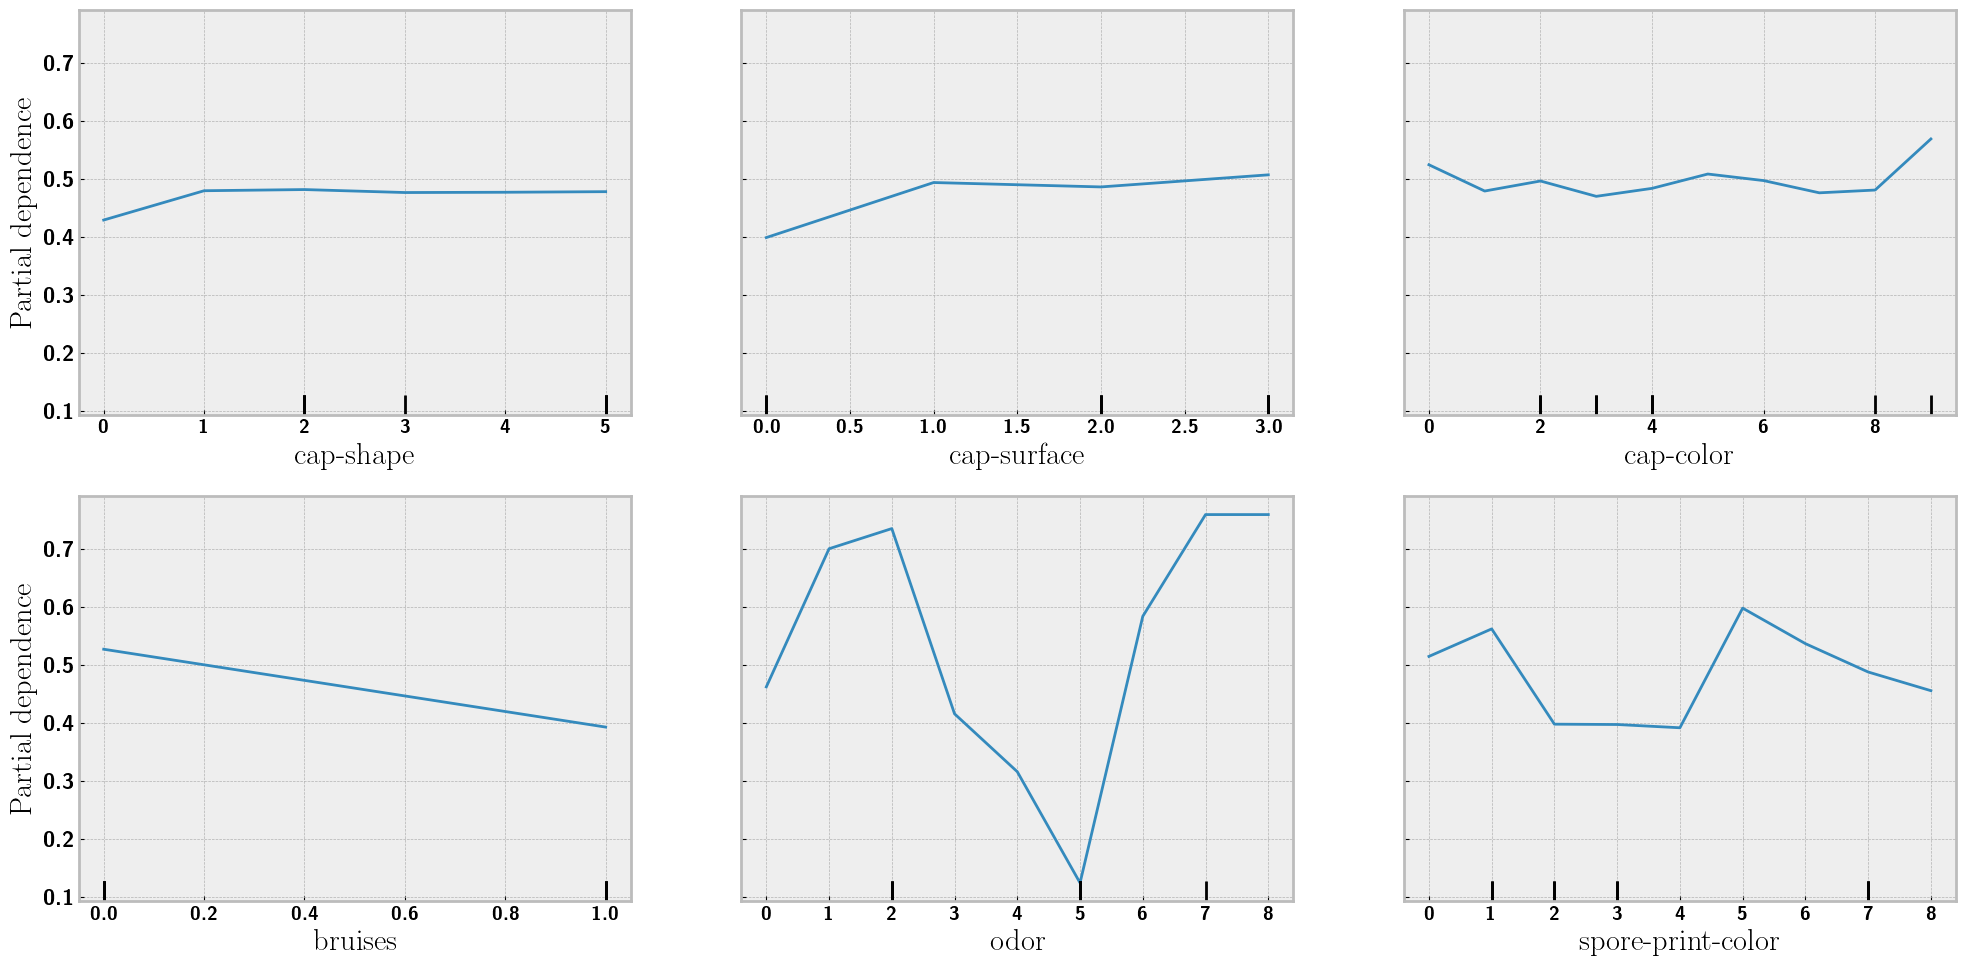

In [33]:
fig, ax = plt.subplots(figsize=(20, 10))
labels_0 = label_encoder.classes_
ax.set_xticklabels(odor_labels)
PartialDependenceDisplay.from_estimator(rfc, X_train, features=[0], 
                                        feature_names=X_train.columns, ax=ax)
plt.tight_layout()
plt.show()
